In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('envitonment.csv')

In [3]:
df

,city,temprature,windspeed,event
0,mumbai,14,5,summer
1,paries,12,488,rain
2,mumbai,12f,11,summer
3,gujrat,12,15,rain
4,paries,51,15mph,summer
5,mumbai,124,15mph,rain
6,paries,44f,12mph,summer
7,gujrat,22,25,rain
8,gujrat,41,11mph,summer
9,paries,12c,15,summer


In [4]:
df.replace({'temprature' : '[a-zA-Z]',
            'windspeed':'[a-zA-Z]'}, '', regex=True, inplace = True)

In [5]:
dt = pd.date_range('05-01-2019','05-10-2019')
dt2 = pd.DatetimeIndex(dt)
dt2

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df.insert(0, "date", dt2)

In [7]:
df

,date,city,temprature,windspeed,event
0,2019-05-01,mumbai,14,5,summer
1,2019-05-02,paries,12,488,rain
2,2019-05-03,mumbai,12,11,summer
3,2019-05-04,gujrat,12,15,rain
4,2019-05-05,paries,51,15,summer
5,2019-05-06,mumbai,124,15,rain
6,2019-05-07,paries,44,12,summer
7,2019-05-08,gujrat,22,25,rain
8,2019-05-09,gujrat,41,11,summer
9,2019-05-10,paries,12,15,summer


In [100]:
g = df.groupby('city')
g

In [9]:
g1 = g.get_group('paries')
g1

,date,city,temprature,windspeed,event
1,2019-05-02,paries,12,488,rain
4,2019-05-05,paries,51,15,summer
6,2019-05-07,paries,44,12,summer
9,2019-05-10,paries,12,15,summer


In [10]:
g.max()

,date,temprature,windspeed,event
city,,,,
gujrat,2019-05-09,41,25,summer
mumbai,2019-05-06,14,5,summer
paries,2019-05-10,51,488,summer


In [11]:
g.describe()

date                                                        \
       count unique                  top freq                first   
city                                                                 
gujrat     3      3  2019-05-08 00:00:00    1  2019-05-04 00:00:00   
mumbai     3      3  2019-05-01 00:00:00    1  2019-05-01 00:00:00   
paries     4      4  2019-05-10 00:00:00    1  2019-05-02 00:00:00   

                            temprature                   ... windspeed       \
                       last      count unique  top freq  ...       top freq   
city                                                     ...                  
gujrat  2019-05-09 00:00:00          3      3   41    1  ...        15    1   
mumbai  2019-05-06 00:00:00          3      3  124    1  ...        11    1   
paries  2019-05-10 00:00:00          4      3   12    2  ...        15    2   

                   event                                 
       first last  count unique     top freq first last  
city                                                     
gujrat   NaN  NaN      3      2    rain    2   NaN  NaN  
mumbai   NaN  NaN      3      2  summer    2   NaN  NaN  
paries   NaN  NaN      4      2  summer    3   NaN  NaN  

[3 rows x 24 columns]

In [12]:
list(g)

[('gujrat',         date    city temprature windspeed   event
  3 2019-05-04  gujrat         12        15    rain
  7 2019-05-08  gujrat         22        25    rain
  8 2019-05-09  gujrat         41        11  summer),
 ('mumbai',         date    city temprature windspeed   event
  0 2019-05-01  mumbai         14         5  summer
  2 2019-05-03  mumbai         12        11  summer
  5 2019-05-06  mumbai        124        15    rain),
 ('paries',         date    city temprature windspeed   event
  1 2019-05-02  paries         12       488    rain
  4 2019-05-05  paries         51        15  summer
  6 2019-05-07  paries         44        12  summer
  9 2019-05-10  paries         12        15  summer)]

In [13]:
g1.windspeed.describe()

count      4
unique     3
top       15
freq       2
Name: windspeed, dtype: object

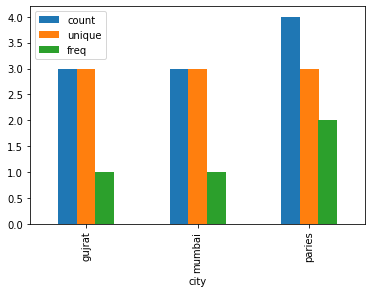

In [17]:
%matplotlib inline
g.windspeed.describe().plot(kind = 'bar')

city
gujrat    AxesSubplot(0.125,0.125;0.775x0.755)
mumbai    AxesSubplot(0.125,0.125;0.775x0.755)
paries    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

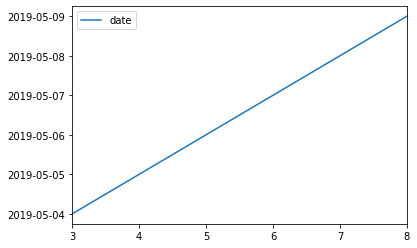

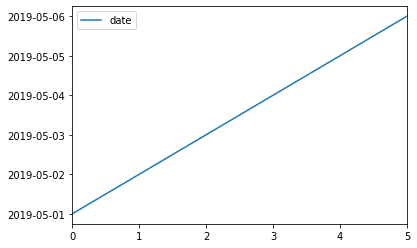

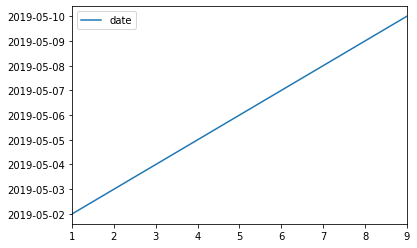

In [20]:
%matplotlib inline
g.plot()

In [21]:
data = pd.read_csv('http://bit.ly/drinksbycountry')

In [79]:
data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [41]:
data[data.continent == 'Asia'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
19,Bhutan,23,0,0,0.4,Asia
24,Brunei,31,2,1,0.6,Asia


In [46]:
g= data.groupby('continent')
g

In [82]:
g.get_group('Oceania')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
8,Australia,261,72,212,10.4,Oceania
40,Cook Islands,0,254,74,5.9,Oceania
59,Fiji,77,35,1,2.0,Oceania
89,Kiribati,21,34,1,1.0,Oceania
106,Marshall Islands,0,0,0,0.0,Oceania
110,Micronesia,62,50,18,2.3,Oceania
118,Nauru,49,0,8,1.0,Oceania
121,New Zealand,203,79,175,9.3,Oceania
125,Niue,188,200,7,7.0,Oceania
129,Palau,306,63,23,6.9,Oceania


In [66]:
Asi_a = g.get_group('Asia')

In [76]:
Asi_a[:][Asi_a.total_litres_of_pure_alcohol == Asi_a.total_litres_of_pure_alcohol.max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
141,Russian Federation,247,326,73,11.5,Asia


In [93]:
g.agg(['count', 'mean', 'std'])

beer_servings                        spirit_servings  \
                      count        mean        std           count   
continent                                                            
Africa                   53   61.471698  80.557816              53   
Asia                     44   37.045455  49.469725              44   
Europe                   45  193.777778  99.631569              45   
North America            23  145.434783  79.621163              23   
Oceania                  16   89.687500  96.641412              16   
South America            12  175.083333  65.242845              12   

                                     wine_servings                         \
                     mean        std         count        mean        std   
continent                                                                   
Africa          16.339623  28.102794            53   16.264151  38.846419   
Asia            60.840909  84.362160            44    9.068182  21.667034   
Europe         132.555556  77.589115            45  142.222222  97.421738   
North America  165.739130  94.993884            23   24.521739  28.266378   
Oceania         58.437500  70.504817            16   35.625000  64.555790   
South America  114.750000  77.077440            12   62.416667  88.620189   

              total_litres_of_pure_alcohol                      
                                     count      mean       std  
continent                                                       
Africa                                  53  3.007547  2.647557  
Asia                                    44  2.170455  2.770239  
Europe                                  45  8.617778  3.358455  
North America                           23  5.995652  2.409353  
Oceania                                 16  3.381250  3.345688  
South America                           12  6.308333  1.531166

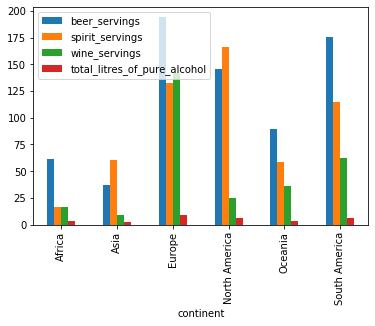

In [98]:
%matplotlib inline
g.mean().plot(kind = 'bar')